In [2]:
import os, shutil, pathlib

original_dir = pathlib.Path("dogs_vs_cats")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

In [3]:
import os
import shutil
from pathlib import Path

# 기준 경로 정의
original_base_dir = Path("dogs_vs_cats/train")  # 원본 이미지가 저장된 디렉토리
new_base_dir = Path("cats_vs_dogs_small")  # 새로운 데이터셋 디렉토리


def make_subset(subset_name, start_index, end_index):
    # "cat"과 "dog" 카테고리에 대해 처리
    for category in ("cat", "dog"):
        # 새로운 디렉토리 경로 생성
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)  # 이미 존재하면 에러 없이 통과

        # 복사를 진행할 파일 이름 리스트 생성
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            # 원본 경로와 대상 경로 설정
            src = original_base_dir / fname
            dst = dir / fname

            # 파일 복사
            if src.exists():  # 원본 파일이 존재할 경우만 복사
                shutil.copy(src, dst)
                print(f"Copied {src} to {dst}")
            else:
                print(f"Source file not found: {src}")  # 파일이 없을 경우 경고 출력


In [4]:
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

Copied dogs_vs_cats/train/cat.0.jpg to cats_vs_dogs_small/train/cat/cat.0.jpg
Copied dogs_vs_cats/train/cat.1.jpg to cats_vs_dogs_small/train/cat/cat.1.jpg
Copied dogs_vs_cats/train/cat.2.jpg to cats_vs_dogs_small/train/cat/cat.2.jpg
Copied dogs_vs_cats/train/cat.3.jpg to cats_vs_dogs_small/train/cat/cat.3.jpg
Copied dogs_vs_cats/train/cat.4.jpg to cats_vs_dogs_small/train/cat/cat.4.jpg
Copied dogs_vs_cats/train/cat.5.jpg to cats_vs_dogs_small/train/cat/cat.5.jpg
Copied dogs_vs_cats/train/cat.6.jpg to cats_vs_dogs_small/train/cat/cat.6.jpg
Copied dogs_vs_cats/train/cat.7.jpg to cats_vs_dogs_small/train/cat/cat.7.jpg
Copied dogs_vs_cats/train/cat.8.jpg to cats_vs_dogs_small/train/cat/cat.8.jpg
Copied dogs_vs_cats/train/cat.9.jpg to cats_vs_dogs_small/train/cat/cat.9.jpg
Copied dogs_vs_cats/train/cat.10.jpg to cats_vs_dogs_small/train/cat/cat.10.jpg
Copied dogs_vs_cats/train/cat.11.jpg to cats_vs_dogs_small/train/cat/cat.11.jpg
Copied dogs_vs_cats/train/cat.12.jpg to cats_vs_dogs_small/t

In [5]:
import keras
from keras import layers

In [6]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

2025-01-16 11:15:54.621236: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-01-16 11:15:54.621259: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-01-16 11:15:54.621267: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-01-16 11:15:54.621646: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-16 11:15:54.621661: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [9]:
from keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", 
    image_size=(180, 180),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [10]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]

In [11]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


2025-01-16 11:16:21.167518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.5017 - loss: 0.6974 - val_accuracy: 0.6120 - val_loss: 0.6863
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.5586 - loss: 0.6878 - val_accuracy: 0.6380 - val_loss: 0.6570
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.5819 - loss: 0.6777 - val_accuracy: 0.6510 - val_loss: 0.6372
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.6491 - loss: 0.6357 - val_accuracy: 0.6050 - val_loss: 0.6458
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.6504 - loss: 0.6172 - val_accuracy: 0.6580 - val_loss: 0.6116
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.6985 - loss: 0.5940 - val_accuracy: 0.6600 - val_loss: 0.6181
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.7144 - loss: 0.5556 - val_accuracy: 0.6780 - val_loss: 0.5758
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.7254 - loss: 0.5407 - val_accuracy: 0.6860 - val_loss: 0.

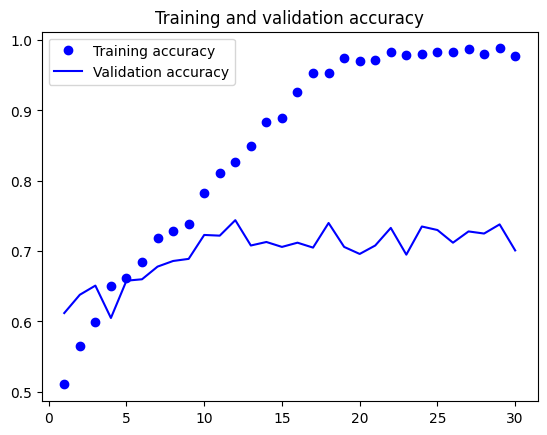

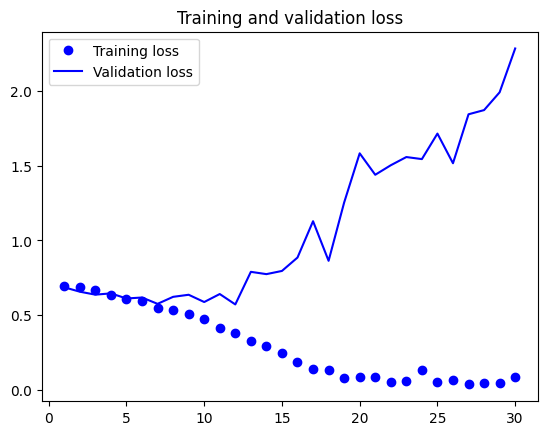

In [12]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [34]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7463 - loss: 0.6282
test accuracy: 0.746


In [14]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

2025-01-16 11:29:26.967060: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


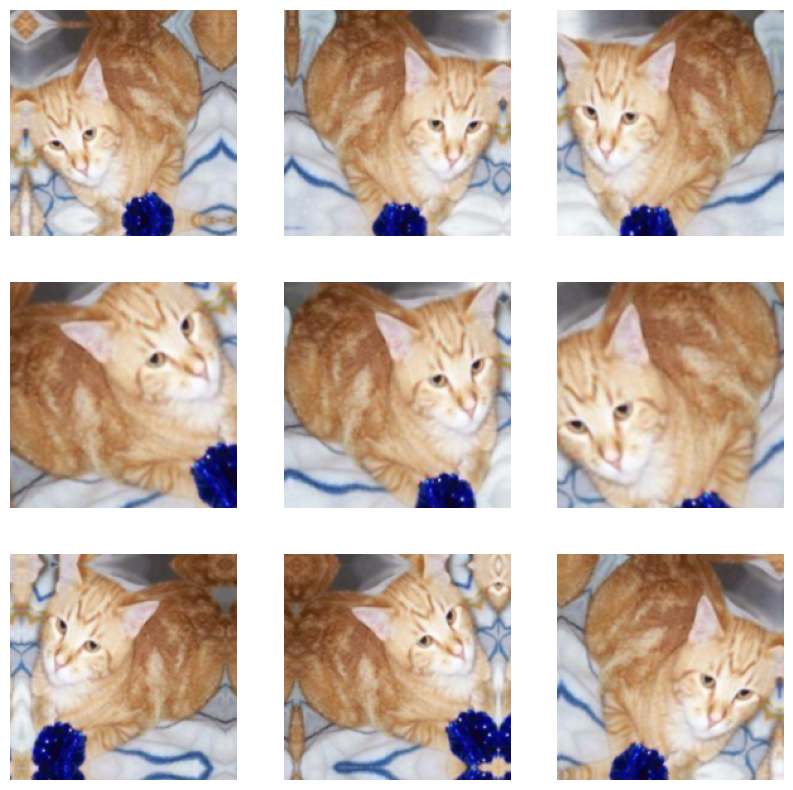

In [26]:
plt.figure(figsize=(10,10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[2].numpy().astype("uint8"))
        plt.axis("off")

In [27]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [28]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [30]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]

In [31]:
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.4925 - loss: 0.6957 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.4946 - loss: 0.6940 - val_accuracy: 0.5510 - val_loss: 0.6915
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.5385 - loss: 0.6933 - val_accuracy: 0.5010 - val_loss: 0.6899
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.5741 - loss: 0.6894 - val_accuracy: 0.6220 - val_loss: 0.6670
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.6224 - loss: 0.6668 - val_accuracy: 0.6430 - val_loss: 0.6304
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.6422 - loss: 0.6572 - val_accuracy: 0.6180 - val_loss: 0.6333
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.6699 - loss: 0.6078 - val_accuracy: 0.6520 - val_loss: 0.6178
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.6666 - loss: 0.6093 - val_accu

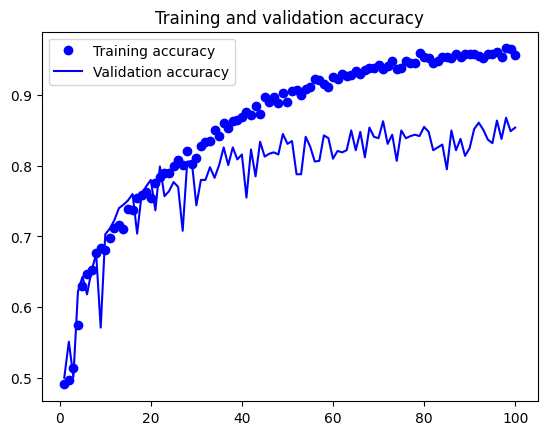

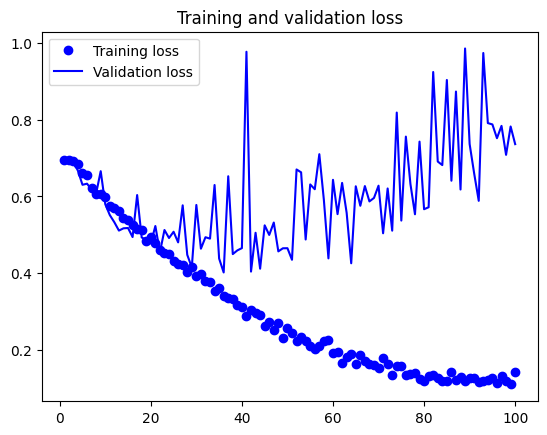

In [32]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [33]:
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8203 - loss: 0.4378
test accuracy: 0.812
